# Data cleanup

In this notebook I am read in the dataset for the first time, taking a closer look at the individual columns to understand what they contain and whether I need them or not for my project. I also deal with missing or duplicate data and decide how to handle them. At the end, I write out a clean version of the dataframe into a new csv file.

In [40]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import altair as alt


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
raw_df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [6]:
raw_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
raw_df.shape

(21597, 21)

In [11]:
raw_df.id.duplicated().value_counts()

id
False    21420
True       177
Name: count, dtype: int64

In [9]:
raw_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Who am I?
William Rodriguez
Buyer  
2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses

In [177]:
raw_df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [18]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [21]:
raw_df.date = pd.to_datetime(raw_df.date, format='%m/%d/%Y')
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

sqft_basement is type str, should be float 

In [24]:
type(raw_df['sqft_basement'][0])

str

In [ ]:
# change data type to float
raw_df = raw_df.astype({'sqft_basement': float})
# not possible, because there is a ? 

In [29]:
raw_df.query('sqft_basement =="?"').sqft_basement.count()
# count how often is a ? in the column

454

replace ? with NaN (with np.nan)

In [30]:
raw_df['sqft_basement'] = raw_df.sqft_basement.replace('?', np.nan)

In [31]:
raw_df = raw_df.astype({'sqft_basement': float})

In [32]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

playing around with lateral and longitudinal coordinate

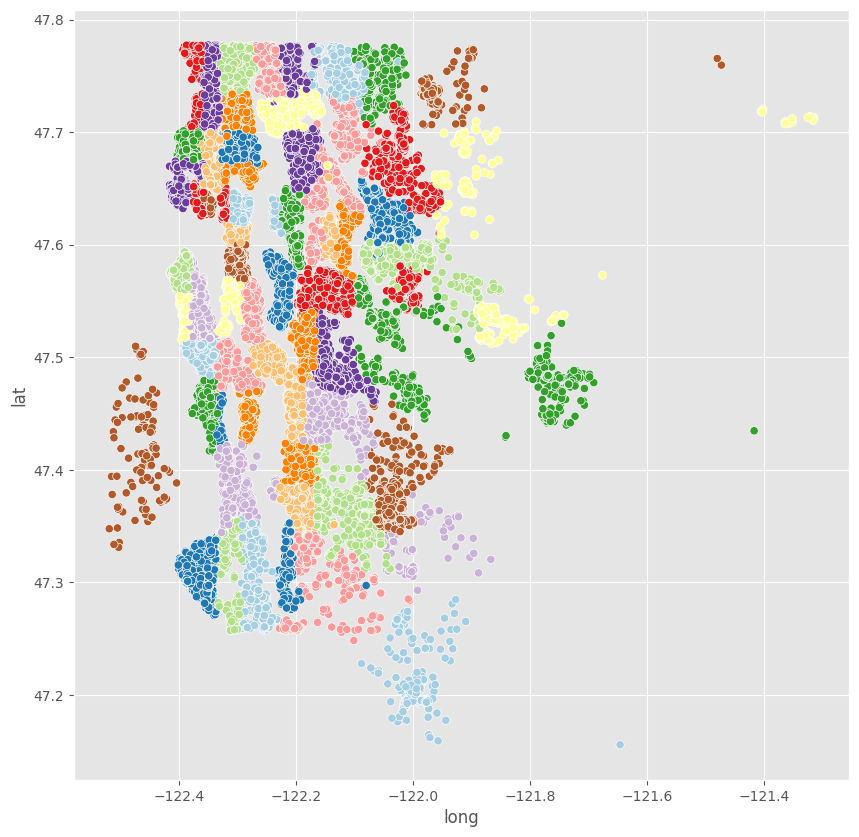

In [186]:
fig = plt.figure(figsize=(10,10))
splot = sns.scatterplot(data=raw_df, x='long', y='lat',   # define dataframe as your data and variables for x and y axes
                       hue='zipcode',                           # hue - color coding, style - markers, legend will be added automatically
                       palette='Paired', legend=False);                                      # what colors to use


### NaNs

In [56]:
raw_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [57]:
print(f"numbers of rows : {raw_df.shape[0]}")
print(f"missing values in waterfront : {round(raw_df.waterfront.isna().sum()/raw_df.shape[0]*100,2)} %")
print(f"missing values in view : {round(raw_df.view.isna().sum()/raw_df.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(raw_df.sqft_basement.isna().sum()/raw_df.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(raw_df.yr_renovated.isna().sum()/raw_df.shape[0]*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.1 %
missing values in yr_renovated : 17.79 %


waterfront: if it is not given, i will set it to Zero respective False  
view: ??  
sqft_basement: == sqft_living - sqft_above   
yr_renovated: == yr_built ??

In [83]:
test_df = raw_df.copy()
test_df.shape


(21597, 21)

In [84]:
test_df.eval('calc_sqft_basement = sqft_living - sqft_above', inplace = True)
test_df.shape

(21597, 22)

In [85]:
test_df.sqft_basement.isna().sum()

454

In [86]:
test_df.query('calc_sqft_basement != sqft_basement').sqft_basement.isna().sum()

454

summary: all entries in sqft_basement are equal to sqft_living - sqft_above  
conclusion: the NaN Entries can be calculated from the other columns

In [ ]:
cleaned_df = test_df
cleaned_df['sqft_basement']=cleaned_df['calc_sqft_basement'] # overwrite all entries
cleaned_df.drop('calc_sqft_basement', inplace=True, axis=1) # delete the calculation column
cleaned_df.head()

In [105]:
cleaned_df.yr_built.describe()

count   21597.000
mean     1971.000
std        29.375
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
Name: yr_built, dtype: float64

waterfront: fill with Zero and change to True/False

In [110]:
cleaned_df.waterfront.fillna(0)

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
         ... 
21592   0.000
21593   0.000
21594   0.000
21595   0.000
21596   0.000
Name: waterfront, Length: 21597, dtype: float64

In [111]:
cleaned_df = cleaned_df.astype({'waterfront': bool})

In [ ]:
cleaned_df.head()

In [115]:
cleaned_df.view.value_counts()

view
0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64

In [ ]:
test_series =test_df.astype({'yr_renovated': bool})
test_series

Year renovated NaN == 0  
zusaetzliche Spalte mit True/False

In [194]:
cleaned_df.yr_renovated.fillna(0, inplace=True)
cleaned_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
cleaned_df['renovated']= cleaned_df.yr_renovated.copy()
cleaned_df = cleaned_df.astype({'renovated': bool})
cleaned_df.head()

In [ ]:
cleaned_df = cleaned_df.astype({'yr_renovated': int})
cleaned_df.head()

In [200]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  bool          
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

write into a new csv

In [202]:
cleaned_df.to_csv('data/King_County_House_prices_dataset_cleaned.csv', index=False)